As part of our CDD, we decided to explore the L(2,1) labeling problem. This problem is also known as “Radio Coloring” because of its applications in assigning frequencies to different radio stations. There are a few different rules related to this problem. 

1. Each vertices will be colored with a number.
2. If two vertices are neighbors and connected by one edge, the difference in their labels must be at least 2.
3. For every vertex, if you go out two edges it shouldn’t share the same label as the vertex on the other end. The simpler way of explaining this is if you have a list of neighbors for every vertex, the neighbors of those neighbors can’t have the same label as the original vertex.

As mentioned the application of this problem is largely focus on assigning frequencies to stations so that there isn't interference caused by stations which are too close either in distance or in frequency.  The original conjecture which people have sough to prove is that if a graph G has a maximum degree of $k$, the most labels needed would be $k^{2}$. While this has yet to be proven for every graph, many partial results have been achieved. 

- Chang and Kuo proved that any L(d,1)-labeling problem can be generalised to be solved in $k^{2} + (d-1)k$ labels which means for L(2,1) labeling it would be $k^{2} + k$
- The original conjecture has been proven for 2-regular graphs (Griggs and Yeh), 3-regular Hamiltonian graphs (Füredi and Kang), and for the incidence graphs of projective planes (Füredi and Kang).
- Griggs and Yeh also proved that for any L(2d, d) labeling problem the maximum amount of labels can be obtained from the L(2,1) labeling of the same graph.
There have been specifics bounds proven for special classes of graphs such as paths, cycles, wheels, etc.

For our CDD, we wanted to do something coding related as well, so we decided to create an algorithm that would label any cycle graph with the minimum number of labels possible.

In [11]:
import networkx as nx 
import matplotlib.pyplot as plt 

def create_cycle(num):
    """
    Return networkx cycle  with a specifed number of vertices

    Args:
        num: number of vertices

    Returns:
        A networkx graph of a cycle with num vertices.
    """
    network = nx.Graph() # Creating the graph and adding nodes
    nodes = range(num) # Creating list of number labels for each node
    network.add_nodes_from(nodes) # Creating nodes
    nx.add_cycle(network, nx.nodes(network)) # Adding edges to make a cycle out of all nodes in the network
    return nx.Graph(network)


Once we created our cycle, we started thinking about the best way to make sure we are meeting all the requirements for labeling. We thought of two different paths here. We could iterate through every element in a list of potential labels and create a set of conditionals to check if it works. If it doesn't work, it would move onto the next label in the list and continue onward until it finds a label which satisfies the conditions. The second method we thought of was attempting to narrow the list of possible labels for each node and then going based off that. Since we set up our labels as a dictionary and updated it after every change, we knew that we could access what the already assigned labels were for past vertices. In this method, we would create a list of values the vertex could not be labeled with and then take those values out of the possible labels list. After that, we choose the lowest possible value to label the node. We ended up implementing the second method since we felt it would be more efficient for larger graphs.

[0, 2, 4, 0, 2, 4, 6]
The span is: 7


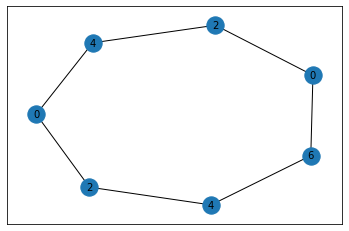

In [12]:
network = create_cycle(7) # Creates a networkx cycle graph
node_list = list(nx.nodes(network)) # A list of numbers with each number representing a node
# Creates a dictionary with the keys being the nodes number and the value the frequency assigned to the node
label_list = dict.fromkeys(node_list)
for i in node_list: # Iterate through each node in the in the graph
    neighbors_list = list(nx.all_neighbors(network, i)) # Find all the neighbors to the node
    bad_list=[] # Initialize list of frequency the node can not be
    for k in neighbors_list: #Iterates through the adjacent nodes
        if label_list[k] is not None: # If the adjacent nodes are assigned a frequency add frequencies to bad frequencies
            bad_list.append(label_list[k]) # The original node cannot be the same as the adjunct
            bad_list.append(label_list[k]+1) # The original node cannot be one frequency away above from the adjacent nodes frequency
            bad_list.append(label_list[k]-1) # The original node cannot be one frequency away below from the adjacent nodes frequency
        secondary_neighbor = list(nx.all_neighbors(network, k)) # List of nodes that are adjacent to the adjacent node
        for j in secondary_neighbor: # Iterate through adjacent to adjacent nodes
            if label_list[j] is not None: #If the adjacent to adjacent node exists add it to the bad frequencies
                bad_list.append(label_list[j])  # The original node cannot be the same as the adjacent to adjacent node
    if bad_list == []: # If there are no adjacent or adjacent to adjacent nodes set the frequency to 0
         label_list[i]=0 # Set the nodes frequency to 0
    else:
        possible_color=range(0,max(bad_list)+2) # List of possible frequencies to choose from, 0 to highest frequency plus 1
        label_list[i]= [x for x in possible_color if x not in bad_list][0] # Find the lowest possible frequency that is not in the bad list and can be used
 
frequencies_list = list(label_list.values()) # list of the frequencies assigned to nodes
print(frequencies_list) # Print out list
pos = nx.spring_layout(network) # Create NetworkX layout
nx.draw_networkx(network,pos,with_labels=False) # Create NetworkX graph visual
nx.draw_networkx_labels(network, pos, label_list, font_size=10) # Create frequency labels NetworkX graph visual
span=max(frequencies_list)-min(frequencies_list)+1 #The span of frequencies used including 0
print("The span is:", span) # Print span




Add 0, 2, 4
Add 0, 2, 4
Add 0, 2, 4
Add 1, 3
[0, 2, 4, 0, 2, 4, 0, 2, 4, 1, 3]
The span is: 4


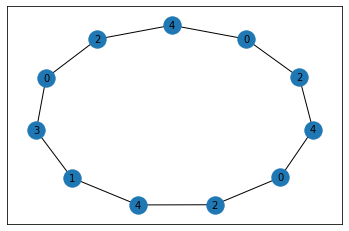

In [13]:
number_of_nodes=11 # Number of nodes in Cycle
network = create_cycle(number_of_nodes) # Create Cycle
node_list = list(nx.nodes(network))# A list of numbers with each number representing a node
# Creates a dictionary with the keys being the nodes number and the value of the frequency assigned to the node
label_list = dict.fromkeys(node_list)
labels=[] # List of frequency labels for nodes
if number_of_nodes>=5: # If the number of nodes is great or equal to five
    number_of_threes=int(number_of_nodes/3) # The number of nodes divided by 3 with no remainder
    for i in range(number_of_threes): # Adds three labels for each 3 that can be divided into the number of nodes
        labels=labels+[0,2,4] # Adds the numbers 0, 2, and 4 in that order to the list of frequency labels
        print("Add 0, 2, 4") # Prints the numbers added
    remander=number_of_nodes%3 # Finds the remainder of the number of nodes divided by 3
    if remander==1: # If the remander is 1
        # Removes the last three labels 0, 2, and 4 from the list
        # replaces them with 0, 3, 1, and 4
        labels=labels[:-3]+[0,3,1,4]
        print("Add 0, 3, 1, 4") # Prints numbers added
    elif remander==2: # If the remander is 2
        labels=labels+[1,3] # Adds the numbers 1 and 3 in that order to the list of frequency labels.
        print("Add 1, 3") # Prints numbers added
print(labels) # Prints list of node frequency labels
for i in range(number_of_nodes): # converts labels into a dictionary
    label_list[i]=labels[i]
pos = nx.spring_layout(network) # Create NetworkX layout
nx.draw_networkx(network,pos,with_labels=False) # Create NetworkX graph visual
nx.draw_networkx_labels(network, pos, label_list, font_size=10) # Create frequency labels NetworkX graph visual
span=max(labels)-min(labels) # The span of frequencies used including 0
print("The span is:", span) # Print span